<a href="https://colab.research.google.com/github/KWSantos/Data-Science/blob/main/Extracting-Data/DataProcessing_Census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importações

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Leitura e análise do dataset

In [ ]:
census = pd.read_csv('adult.data')

In [ ]:
census

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
columns = ["age", "workclass", "final-weight", "education", "education-num", "marital-satus", "occupation", "relationship", "race","sex","capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
census.columns = columns
census

,age,workclass,final-weight,education,education-num,marital-satus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
census.describe()

,age,final-weight,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
census.isnull().sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-satus,0
occupation,0
relationship,0
race,0
sex,0


#Vizualização dos Dados

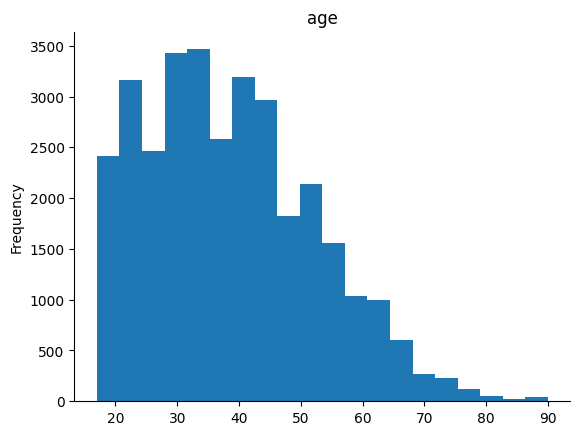

In [ ]:
# @title age

from matplotlib import pyplot as plt
census['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

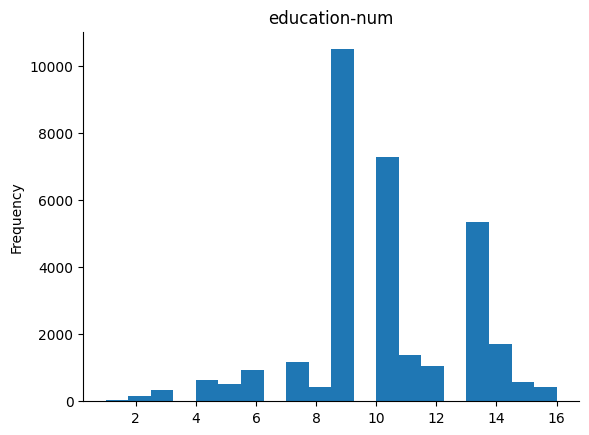

In [ ]:
# @title education-num

from matplotlib import pyplot as plt
census['education-num'].plot(kind='hist', bins=20, title='education-num')
plt.gca().spines[['top', 'right',]].set_visible(False)

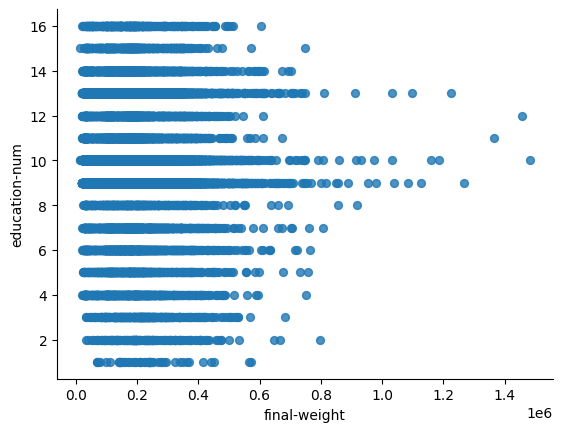

In [ ]:
# @title final-weight vs education-num

from matplotlib import pyplot as plt
census.plot(kind='scatter', x='final-weight', y='education-num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
np.unique(census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24719,  7841]))

<Axes: xlabel='count', ylabel='income'>

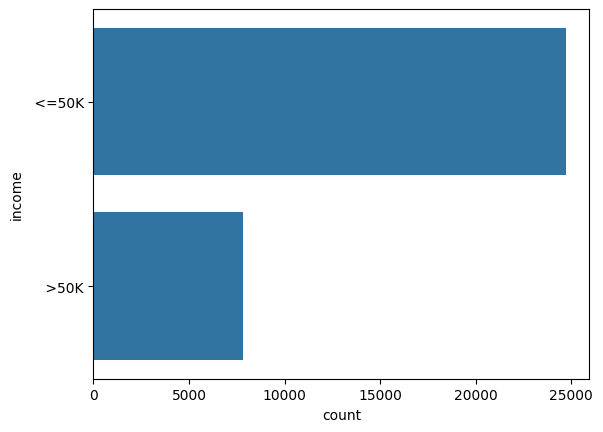

In [ ]:
sns.countplot(census['income'])

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7077.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

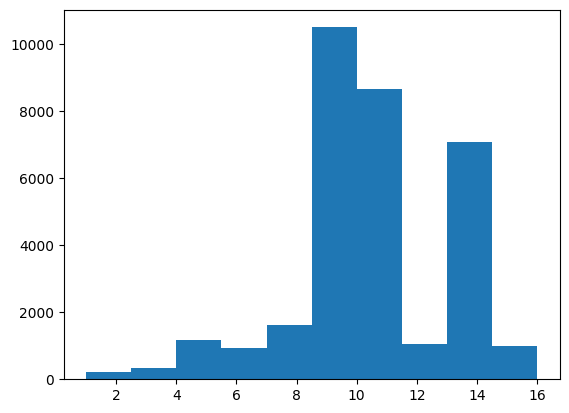

In [ ]:
plt.hist(x = census['education-num'])

(array([  736.,  2192.,  2317., 17734.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

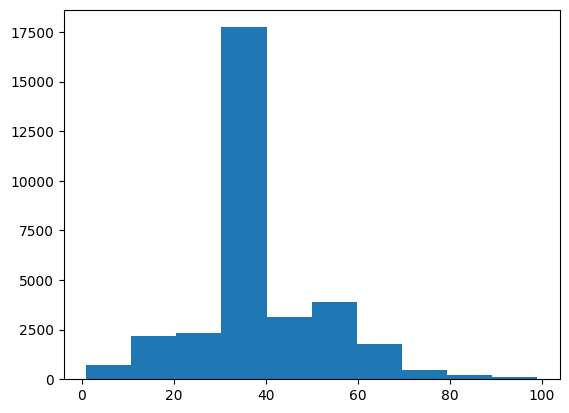

In [ ]:
plt.hist(x = census['hours-per-week'])

In [ ]:
graph = px.treemap(census, path=['workclass', 'income', 'age'])
graph.show()

In [ ]:
graph = px.parallel_categories(census, dimensions=['workclass', 'occupation', 'income'])
graph.show()

In [ ]:
graph = px.parallel_categories(census, dimensions=['education', 'income'])
graph.show()

#Pré-processamento dos dados

In [ ]:
X_census = census.drop('income', axis=1).values
y_census = census['income'].values

In [ ]:
X_census

array([[50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       [53, ' Private', 234721, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
labelEncoder = LabelEncoder()
x_workclass = labelEncoder.fit_transform(X_census[:, 1])
x_education = labelEncoder.fit_transform(X_census[:, 3])
x_marital_status = labelEncoder.fit_transform(X_census[:, 5])
x_ocupation = labelEncoder.fit_transform(X_census[:, 6])
x_relationship = labelEncoder.fit_transform(X_census[:, 7])
x_race = labelEncoder.fit_transform(X_census[:, 8])
x_sex = labelEncoder.fit_transform(X_census[:, 9])
x_native_country = labelEncoder.fit_transform(X_census[:, 13])

In [ ]:
X_census[:, 1] = x_workclass
X_census[:, 3] = x_education
X_census[:, 5] = x_marital_status
X_census[:, 6] = x_ocupation
X_census[:, 7] = x_relationship
X_census[:, 8] = x_race
X_census[:, 9] = x_sex
X_census[:, 13] = x_native_country
X_census

array([[50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       [53, 4, 234721, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [ ]:
oneHotEncoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')
X_census = oneHotEncoder.fit_transform(X_census).toarray()

In [ ]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
X_census.shape

(32560, 108)

In [ ]:
standardScaler = StandardScaler()
X_census = standardScaler.fit_transform(X_census)
X_census[0]

array([-0.24445418, -0.17429787, -0.26210166, -0.01466404, -1.51686919,
       -0.18839232,  3.43712857, -0.20368294, -0.02074031, -0.17175596,
       -0.19348971, -0.11609376, -0.07201712, -0.10165112, -0.14227403,
       -0.12664692, -0.18406669, -0.21053771,  2.25420373, -0.11334564,
       -0.68995763, -0.23637774, -0.03960803, -0.13419763, -0.53715487,
       -0.39751513, -0.02658736,  1.08357985, -0.11403855, -0.69875106,
       -0.18028746, -0.17736093, -0.24494765, -0.36181344, -0.01662796,
       -0.37950184,  2.64723821, -0.17745303, -0.20958133, -0.25595851,
       -0.33554707, -0.06780269, -0.3816701 , -0.14261071, -0.35532224,
       -0.17128158, -0.22710722,  1.21160036, -0.58510536, -0.17625251,
       -0.42935363, -0.34403822, -0.22493044, -0.09820239, -0.18155482,
       -0.32577377, -0.09161305,  0.41302713, -0.70308748,  0.70308748,
       -0.13502538, -0.02416358, -0.06107436, -0.04804954, -0.04260668,
       -0.05409462, -0.04641669, -0.02933754, -0.05715034, -0.05

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_census, y_census, test_size=0.15, random_state=0)

In [ ]:
import pickle
with open('census.pkl', mode='wb') as f:
  pickle.dump([x_train, y_train, x_test, y_test], f)